In [204]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime as dt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error

In [215]:
#Get the Dataset
stock_data = pd.read_csv(r"C:\Users\ritik\OneDrive\Documents\project data analysis\Bharat Intern Project\Task-1 Stock Prediciton\DIXON TECHNOLOGIES HISTORICAL DATA.csv",index_col='Date', encoding='unicode_escape')
print(stock_data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01   412.579987   414.630005   407.000000   408.619995   407.180573   
2019-01-02   410.000000   412.000000   400.410004   402.109985   400.693512   
2019-01-03   403.600006   407.910004   400.920013   407.250000   405.815430   
2019-01-04   407.600006   411.000000   406.529999   408.839996   407.399841   
2019-01-07   412.019989   413.730011   398.000000   401.579987   400.165405   
...                 ...          ...          ...          ...          ...   
2023-10-18  5479.950195  5508.649902  5434.000000  5475.299805  5475.299805   
2023-10-19  5440.000000  5575.000000  5422.250000  5501.799805  5501.799805   
2023-10-20  5498.000000  5534.950195  5474.049805  5520.899902  5520.899902   
2023-10-23  5520.000000  5607.100098  5400.049805  5418.000000  5418.000000   
2023-10-25  5418.000000  5518.000000  5418.000000  5

In [216]:
# write some Basic queries
stock_data.head(7)
stock_data.describe()
stock_data.info()
stock_data.isnull()
#check null values
stock_data.isnull().sum()
stock_data.shape


<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 2019-01-01 to 2023-10-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1191 non-null   float64
 1   High       1191 non-null   float64
 2   Low        1191 non-null   float64
 3   Close      1191 non-null   float64
 4   Adj Close  1191 non-null   float64
 5   Volume     1191 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 65.1+ KB


(1191, 6)

In [217]:
stock_data.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,4809.000000,4857.000000,4770.000000,4780.549805,4777.592285,428194
2023-08-14,4780.000000,4780.000000,4632.850098,4651.250000,4648.372559,483569
2023-08-16,4648.000000,4770.000000,4585.000000,4753.100098,4750.159668,551326
2023-08-17,4770.799805,4810.000000,4671.000000,4682.500000,4679.603027,584616
2023-08-18,4690.000000,4776.000000,4635.000000,4737.799805,4734.868652,512351
2023-08-21,4749.950195,4909.899902,4730.100098,4893.750000,4890.722656,778262
2023-08-22,4940.000000,5035.000000,4886.950195,4995.000000,4991.909668,948055
2023-08-23,5011.649902,5068.899902,4951.049805,4996.799805,4993.708496,764519
2023-08-24,5024.000000,5050.200195,4938.600098,4947.100098,4944.039551,319293


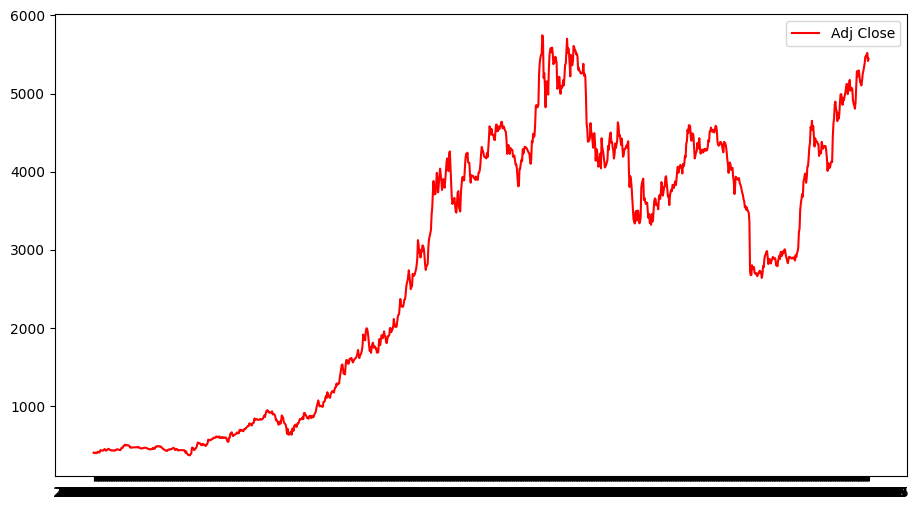

In [218]:
# Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model. 
#plot indicates the stock’s closing price on 18-oct-2023 of stock market trading.
#Plot the True Adj Close Value
plt.figure(figsize=(11,6))
plt.plot(stock_data['Adj Close'], label='Adj Close',color="Red")
plt.legend()
plt.show()

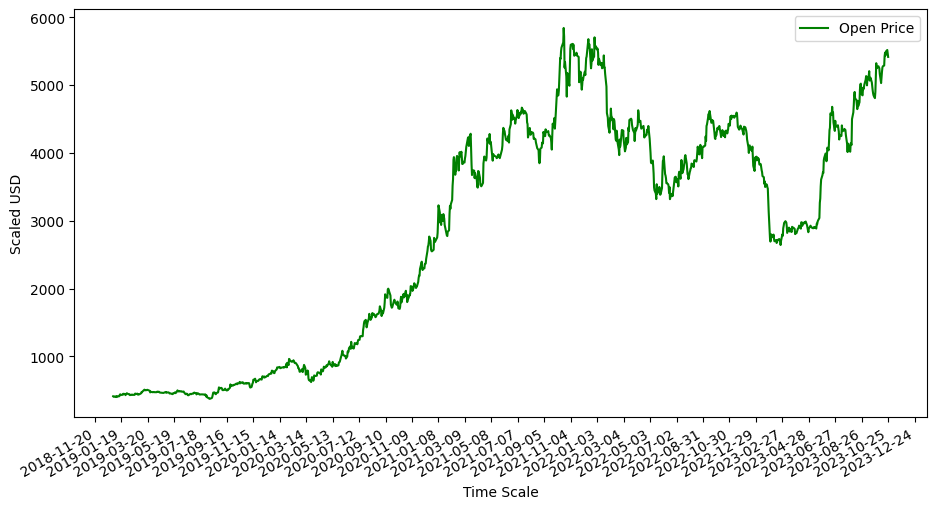

In [219]:
# Plotting the open price points of data stock over 3 years.
plt.figure(figsize=(11,6))
plt.gca().xaxis.set_major_formatter (mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator (mdates. DayLocator (interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['Open'], label='Open Price',color="Green")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

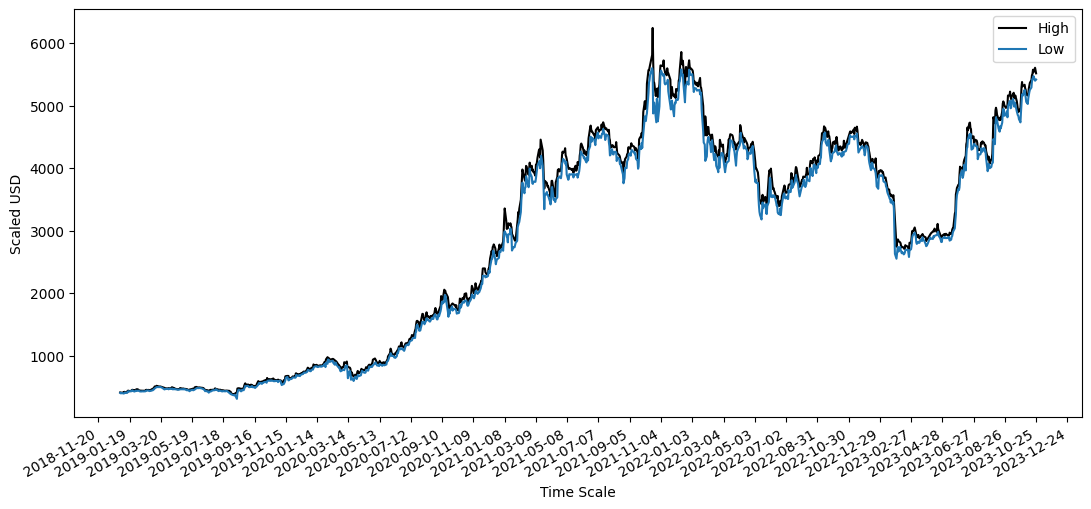

In [220]:
# Plotting the High and Low points of data stock over 3 years.
plt.figure(figsize=(13,6))
plt.gca().xaxis.set_major_formatter (mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator (mdates. DayLocator (interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High',color='Black')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

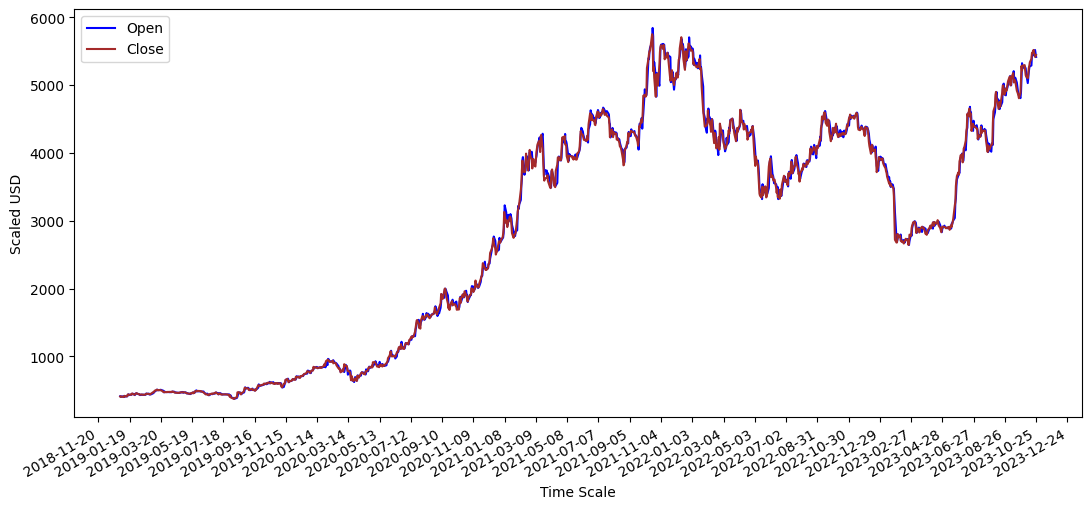

In [221]:
# Plotting the Open and Close points of data stock over 3 years.
plt.figure(figsize=(13,6))
plt.gca().xaxis.set_major_formatter (mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator (mdates. DayLocator (interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['Open'], label='Open',color='Blue')
plt.plot(x_dates, stock_data['Close'], label='Close', color='Brown')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [222]:
# Data Preprocessing
target_y= stock_data['Close'] 
X_feat = stock_data.iloc[:,0:3]

In [223]:
# Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data=X_ft,
                    index=X_feat.index)

In [225]:
def lstm_split(data, n_steps):
    x, y = [], []
    for i in range(len(data)-n_steps+1):
        x.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1, -1])
        
    return np.array(x), np.array(y)

In [226]:
#Train and Test Sets
x1, y1 = lstm_split(X_ft.values, n_steps=2)

train_split=0.8
split_idx= int(np.ceil(len(x1)*train_split))
stock_data_index=X_ft.index

X_train, X_test = x1[:split_idx], x1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = X_ft.index[:split_idx],  X_ft.index[split_idx:]

print(x1.shape, X_train.shape, X_test.shape, y_test.shape,X_test_date.shape)
print(y_test.ndim)



(1190, 2, 2) (952, 2, 2) (238, 2, 2) (238,) (239,)
1


In [227]:
#Building the LSTM model
lstm = Sequential()
lstm.add(LSTM(35, input_shape=(X_train.shape[1], X_train.shape[2]),
               activation='relu', return_sequences=True))

lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 35)             5320      
                                                                 
 dense_6 (Dense)             (None, 2, 1)              36        
                                                                 
Total params: 5356 (20.92 KB)
Trainable params: 5356 (20.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [228]:
history=lstm.fit(X_train, y_train,
                 epochs=100, batch_size=4,
                 verbose=2, shuffle=False)

Epoch 1/100
238/238 - 4s - loss: 0.5702 - 4s/epoch - 18ms/step
Epoch 2/100
238/238 - 1s - loss: 0.1321 - 874ms/epoch - 4ms/step
Epoch 3/100
238/238 - 1s - loss: 0.0212 - 848ms/epoch - 4ms/step
Epoch 4/100
238/238 - 1s - loss: 0.0074 - 892ms/epoch - 4ms/step
Epoch 5/100
238/238 - 1s - loss: 0.0059 - 1s/epoch - 5ms/step
Epoch 6/100
238/238 - 1s - loss: 0.0053 - 826ms/epoch - 3ms/step
Epoch 7/100
238/238 - 1s - loss: 0.0050 - 677ms/epoch - 3ms/step
Epoch 8/100
238/238 - 1s - loss: 0.0049 - 626ms/epoch - 3ms/step
Epoch 9/100
238/238 - 1s - loss: 0.0047 - 609ms/epoch - 3ms/step
Epoch 10/100
238/238 - 1s - loss: 0.0047 - 634ms/epoch - 3ms/step
Epoch 11/100
238/238 - 1s - loss: 0.0046 - 650ms/epoch - 3ms/step
Epoch 12/100
238/238 - 1s - loss: 0.0045 - 855ms/epoch - 4ms/step
Epoch 13/100
238/238 - 1s - loss: 0.0045 - 646ms/epoch - 3ms/step
Epoch 14/100
238/238 - 1s - loss: 0.0045 - 671ms/epoch - 3ms/step
Epoch 15/100
238/238 - 1s - loss: 0.0045 - 652ms/epoch - 3ms/step
Epoch 16/100
238/238 - 1

In [229]:
# Predicted stock analysis plot
y_pred = lstm.predict(X_test)
print(y_pred.ndim)
print(y_test.ndim)
print(y_test.shape)

8/8 [==============================] - 0s 4ms/step
3
1
(238,)


In [230]:
# Reshape y_pred to 2D
y_pred_reshaped = y_pred.reshape(-1, 1)
print(y_pred_reshaped.ndim)
print(y_pred_reshaped.shape)

2
(476, 1)


In [231]:
# Inverse Transform y_test and y_pred
scaler = StandardScaler()
scaler.fit(y_train.reshape(-1, 1))

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

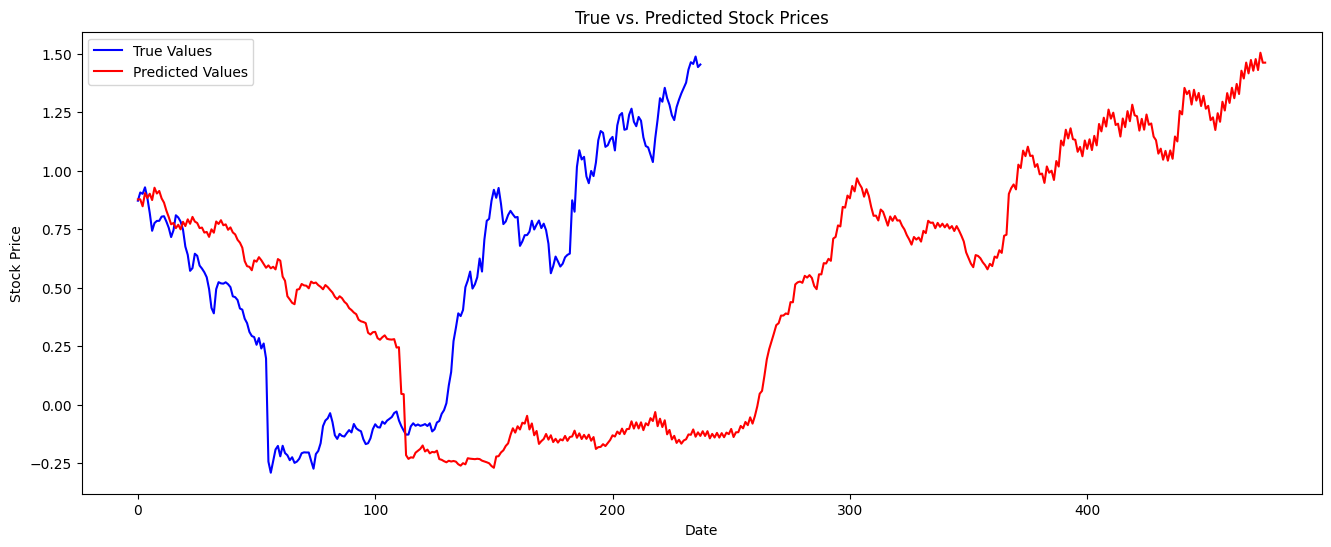

In [235]:
# Plotting True vs Predicted Values
plt.figure(figsize=(16, 6))
plt.plot(y_test_inverse, label='True Values', color='blue')
plt.plot(y_pred_inverse, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('True vs. Predicted Stock Prices')
plt.legend()
plt.show()

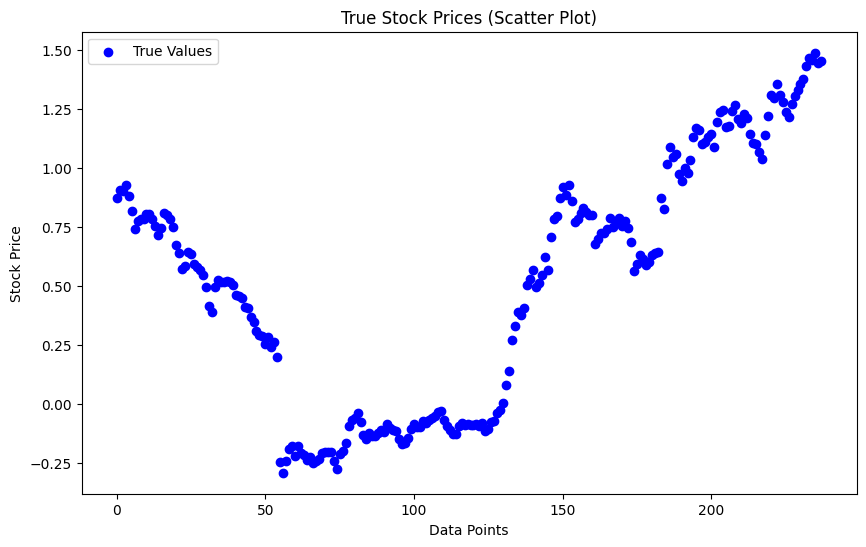

In [214]:
# Plotting True Values as Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_inverse)), y_test_inverse, label='True Values', color='blue', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.title('True Stock Prices (Scatter Plot)')
plt.legend()
plt.show()

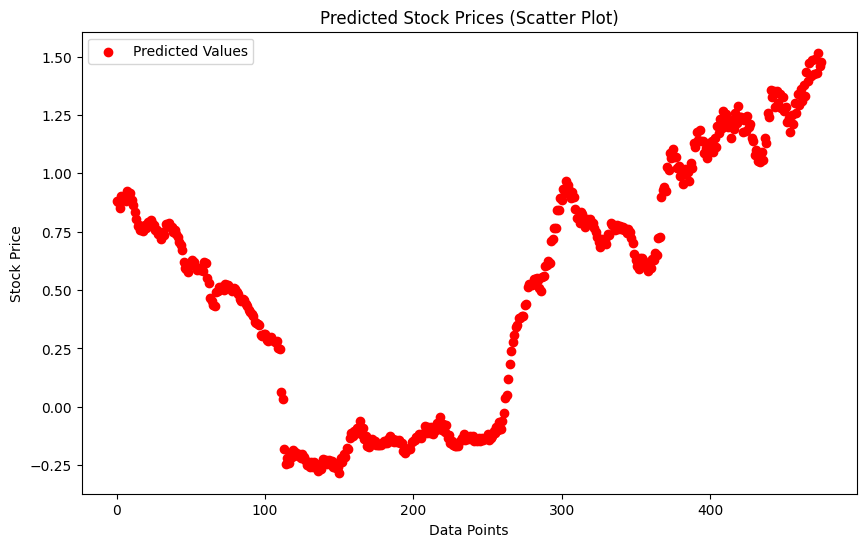

In [213]:
# Plotting Predicted Values as Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred_inverse)), y_pred_inverse, label='Predicted Values', color='red', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices (Scatter Plot)')
plt.legend()
plt.show()